# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading

How many years of data are logged in our dataset? 

In [6]:
years = df['YEAR'].nunique()
print(f'The number of years of data logged in our dataset is: {years}')

The number of years of data logged in our dataset is: 33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [11]:
michiganData = df[df['STATE'] == 'MICHIGAN']
ohioData = df[df['STATE'] == 'OHIO']

avgMich = michigan_data['AVG_READING_4_SCORE'].mean()
avgOhio = ohio_data['AVG_READING_4_SCORE'].mean()

# Compare and print the results
if avgMich > avgOhio:
    print('Michigan has a higher average grade 4 reading score.')
elif avgMich < avgOhio:
    print('Ohio has a higher average grade 4 reading score.')
else:
    print('Michigan and Ohio have the same average grade 4 reading score.')

Ohio has a higher average grade 4 reading score.


Find the average for your chosen test across all states in 2019

In [14]:
avgreading2019 = df[df['YEAR'] == 2019]['AVG_READING_4_SCORE'].mean()
print(f'The average grade 4 reading score across all states in 2019 is: {avgreading2019:.2f}')

The average grade 4 reading score across all states in 2019 is: 219.79


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [15]:
maxStateReading = df.groupby('STATE')['AVG_READING_4_SCORE'].max()
print(maxStateReading)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [22]:
df['AVG_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

# Group by state and calculate the average expenditure per student
avgExpenditureStudent = df.groupby('STATE')['AVG_EXPENDITURE_PER_STUDENT'].mean()

# Display the result
print(avgExpenditureStudent)

STATE
ALABAMA                  7.882837
ALASKA                  14.170685
ARIZONA                  7.499457
ARKANSAS                 8.225769
CALIFORNIA               9.492956
COLORADO                 8.832212
CONNECTICUT             13.992111
DELAWARE                12.230080
DISTRICT_OF_COLUMBIA    18.212654
DODEA                         NaN
FLORIDA                  8.581060
GEORGIA                  8.836982
HAWAII                   9.867800
IDAHO                    6.505544
ILLINOIS                10.732388
INDIANA                  9.547275
IOWA                     9.752215
KANSAS                   9.110558
KENTUCKY                 8.303635
LOUISIANA                8.704111
MAINE                   11.004162
MARYLAND                11.523504
MASSACHUSETTS           12.869153
MICHIGAN                10.942132
MINNESOTA               11.083583
MISSISSIPPI              7.041915
MISSOURI                 8.893105
MONTANA                  8.880870
NATIONAL                      NaN
NEBRASKA

Feature engineering justification: I did average expenditure per student because you can see how much each state spends on each student. This helps show a clear view on which states need to improve on their spending per student. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

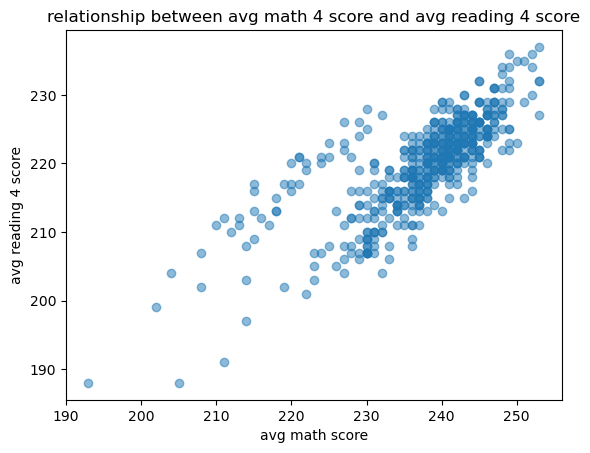

In [110]:
plt.scatter(df['AVG_MATH_4_SCORE'], df['AVG_READING_4_SCORE'], alpha=0.5)
plt.title('relationship between avg math 4 score and avg reading 4 score')
plt.xlabel('avg math score')
plt.ylabel('avg reading 4 score')
plt.show()


correlation between average reading score and average math score

**Visualization 2**

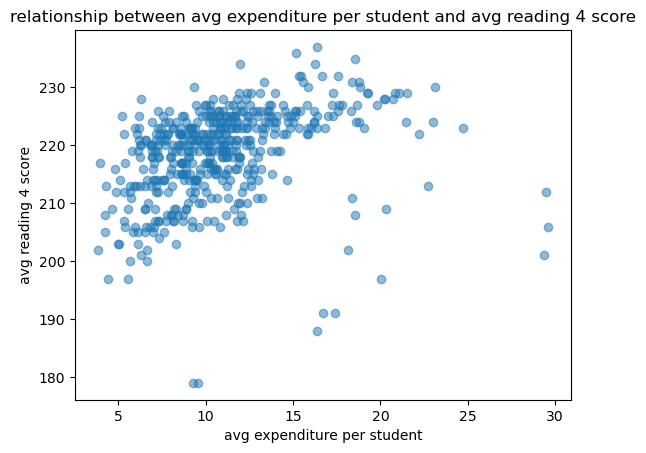

In [71]:
plt.scatter(df['AVG_EXPENDITURE_PER_STUDENT'], df['AVG_READING_4_SCORE'], alpha=0.5)
plt.title('relationship between avg expenditure per student and avg reading 4 score')
plt.xlabel('avg expenditure per student')
plt.ylabel('avg reading 4 score')
plt.show()

correlation between average reading 4 score and average expenditure per student

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [79]:
from sklearn.model_selection import train_test_split

In [100]:
X = df[['AVG_MATH_4_SCORE', 'AVG_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model = LinearRegression()

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [106]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
model.score(X_test, y_test)


0.377057015342675

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

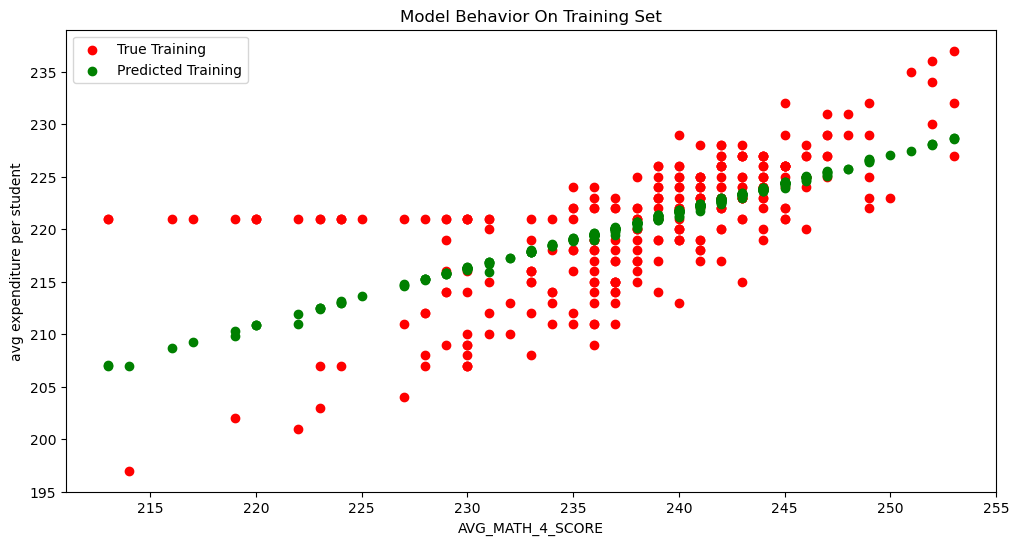

In [108]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('avg expenditure per student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

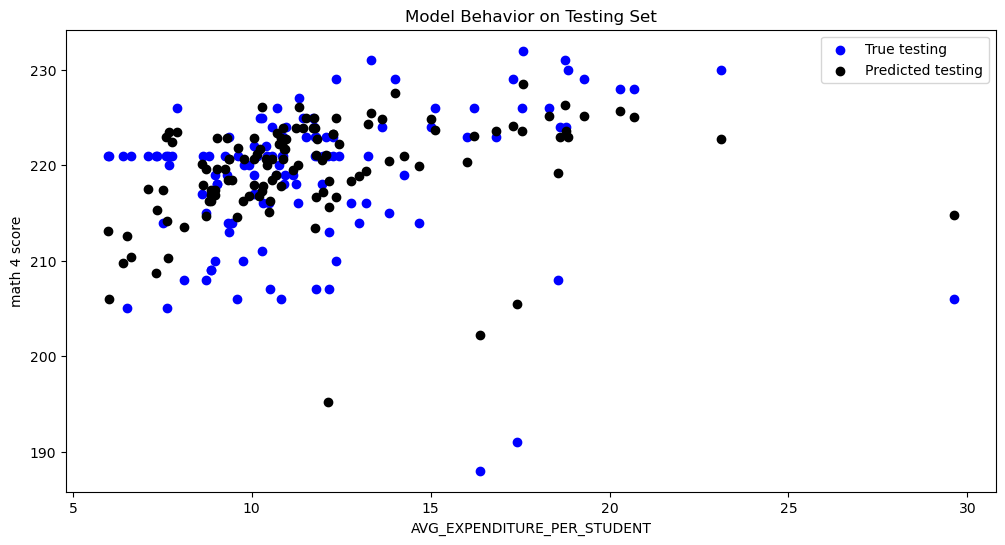

In [109]:
col_name = 'AVG_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('math 4 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I made a linear regression model comparing average expenditure per student and their average math 4 scores. The model works properly and shows the relationship between the two variables. They have a r-squared value of 0.377 which means that the the linear model I used doesn't fit the data that well. This could be because the two variables I compared don't have much in common or a strong relationship. I would say that the model doesn't perform that well because I didn't choose good variables to compare with each other. They don't really have a strong relationship with each other and the linear regression model I made helps show that. 